# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project: Regression and Modularization

#### (Notebook-1)

## Problem Statement

Predict the bike rental count per hour based on the environmental and seasonal settings (such as weather, day, time, humidity, wind speed, season etc).

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* perform Data preprocessing
* apply  ML algorithms on **Bike Sharing** dataset
* calculate the MSE value of regression techniques

## Dataset Description

The dataset chosen for this mini-project is a modified version of [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset). This dataset contains the hourly count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17379 instances of each 14 features.

<br>
<img src="https://cdn.iisc.talentsprint.com/AIandMLOps/Images/BikeShareSystem.jpg" width=400px>
<br><br>

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

### Dataset Characteristics

* **dteday:** hourly date
* **season:**
    * spring
    * summer
    * fall
    * winter
* **hr:** hour
* **holiday:** whether the day is considered a holiday
* **weekday:** day of the week
* **workingday:** whether the day is neither a weekend nor holiday
* **weathersit:**
    * Clear, Few clouds, Partly cloudy, Partly cloudy
    * Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* **temp:** temperature in Celsius
* **atemp:** "feels like" temperature in Celsius
* **humidity:** relative humidity
* **windspeed:** wind speed
* **casual:** count of casual/non-registered users
* **registered:** count of registered users
* **cnt:** count of total rental bikes including both casual and registered

In [73]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/MiniProjects/Datasets/bike-sharing-dataset.csv
!ls | grep ".csv"
print("Dataset downloaded successfully!")

'wget' is not recognized as an internal or external command,
operable program or batch file.


Dataset downloaded successfully!


'ls' is not recognized as an internal or external command,
operable program or batch file.


### Import Required Packages

In [4]:
# Loading the Required Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## **1.** Load, Explore and **Prepare the Data Set**

* Understand different features in the training dataset
* Understand the data types of each columns
* Notice the columns of missing values

In [5]:
# Reading Our Dataset
bikeshare = pd.read_csv("C:\\Miniproject\\bike-sharing-dataset.csv")
bikeshare.shape

(17379, 14)

In [7]:
bikeshare.iloc[99]

dteday        2012-09-28
season            winter
hr                   7am
holiday               No
weekday              Fri
workingday           Yes
weathersit          Mist
temp               18.32
atemp            18.9998
hum                 94.0
windspeed            0.0
casual                10
registered           384
cnt                  394
Name: 99, dtype: object

In [77]:
# Getting information about the dataset
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  object 
 2   hr          17379 non-null  object 
 3   holiday     17379 non-null  object 
 4   weekday     16504 non-null  object 
 5   workingday  17379 non-null  object 
 6   weathersit  16121 non-null  object 
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 1.9+ MB


From above, it can be seen that there are mising values in `weekday` and `weathersit` columns.

## **2. Data Processing**


 ### 2.1 Working on `dteday` column to extract year and month

Extract year and month from the date column and create two another columns

  

In [78]:
def get_year_and_month(dataframe):

    df = dataframe.copy()
    # convert 'dteday' column to Datetime datatype
    df['dteday'] = pd.to_datetime(df['dteday'], format='%Y-%m-%d')
    # Add new features 'yr' and 'mnth
    df['yr'] = df['dteday'].dt.year
    df['mnth'] = df['dteday'].dt.month_name()

    return df

In [79]:
bikeshare = get_year_and_month(bikeshare)
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   hr          17379 non-null  object        
 3   holiday     17379 non-null  object        
 4   weekday     16504 non-null  object        
 5   workingday  17379 non-null  object        
 6   weathersit  16121 non-null  object        
 7   temp        17379 non-null  float64       
 8   atemp       17379 non-null  float64       
 9   hum         17379 non-null  float64       
 10  windspeed   17379 non-null  float64       
 11  casual      17379 non-null  int64         
 12  registered  17379 non-null  int64         
 13  cnt         17379 non-null  int64         
 14  yr          17379 non-null  int32         
 15  mnth        17379 non-null  object        
dtypes: datetime64[ns](1), 

In [80]:
bikeshare.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr,mnth
0,2012-11-05,winter,6am,No,Mon,Yes,Mist,6.10,3.0014,49.0,19.0012,4,135,139,2012,November
1,2011-07-13,fall,4am,No,Wed,Yes,Clear,26.78,28.9988,58.0,16.9979,0,5,5,2011,July
2,2012-02-09,spring,11am,No,Thu,Yes,Clear,3.28,-0.9982,52.0,15.0013,4,95,99,2012,February
3,2012-03-22,summer,7am,No,Thu,Yes,Mist,14.56,15.0002,100.0,6.0032,29,332,361,2012,March
4,2011-11-08,winter,12pm,No,Tue,Yes,Clear,16.44,17.0000,52.0,8.9981,28,175,203,2011,November


## **3. Data Exploration**

### 3.1 Find numerical and categorical variables

In [81]:
unused_colms = ['dteday', 'casual', 'registered']   # unused columns will be removed at later stage
target_col = ['cnt']

numerical_features = []
categorical_features = []

for col in bikeshare.columns:
    if col not in target_col + unused_colms:
        if bikeshare[col].dtypes == 'float64':
            numerical_features.append(col)
        else:
            categorical_features.append(col)


print('Number of numerical variables: {}'.format(len(numerical_features)),":" , numerical_features)

print('Number of categorical variables: {}'.format(len(categorical_features)),":" , categorical_features)

Number of numerical variables: 4 : ['temp', 'atemp', 'hum', 'windspeed']
Number of categorical variables: 8 : ['season', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'yr', 'mnth']


### 3.2 Find missing values in variables

In [82]:
# First in numerical variables
bikeshare[numerical_features].isnull().sum()

temp         0
atemp        0
hum          0
windspeed    0
dtype: int64

In [83]:
# Now in categorical variables
bikeshare[categorical_features].isnull().sum()

season           0
hr               0
holiday          0
weekday        875
workingday       0
weathersit    1258
yr               0
mnth             0
dtype: int64

### 3.3 Determine cardinality of categorical variables

In [84]:
# Count of unique values
bikeshare[categorical_features].nunique()

season         4
hr            24
holiday        2
weekday        7
workingday     2
weathersit     4
yr             2
mnth          12
dtype: int64

### 3.4 Determine the distribution of numerical variables

c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

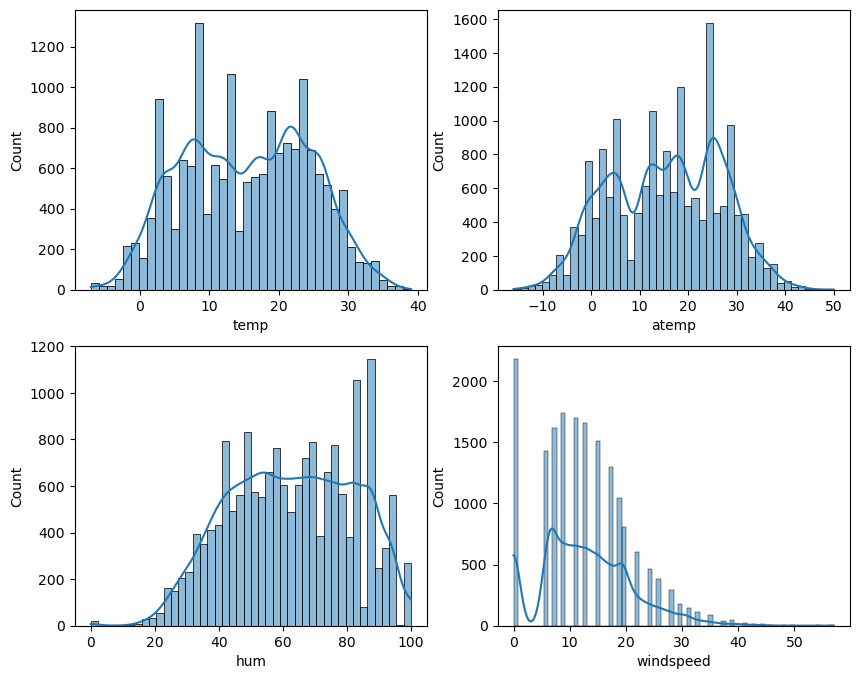

In [85]:
# Visualize distribution using histplot

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(ax = ax[0, 0], x = bikeshare[numerical_features[0]], kde=True)
sns.histplot(ax = ax[0, 1], x = bikeshare[numerical_features[1]], kde=True)
sns.histplot(ax = ax[1, 0], x = bikeshare[numerical_features[2]], kde=True)
sns.histplot(ax = ax[1, 1], x = bikeshare[numerical_features[3]], kde=True)
plt.show()

### 3.5 Check for any outliers in numerical variables

Hint: [Boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

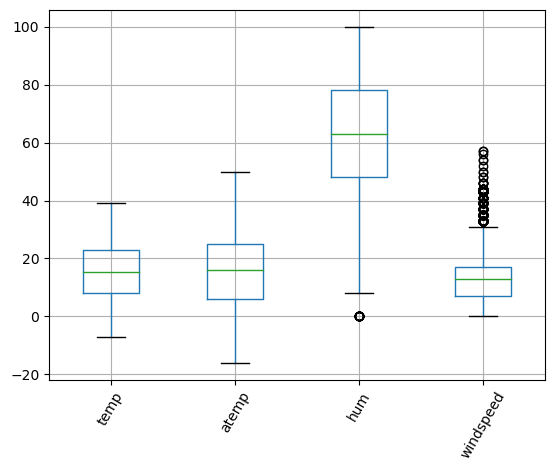

In [86]:
# Check for outliers in continuous features
bikeshare[numerical_features].boxplot()
plt.xticks(rotation= 60)
plt.show()

Outliers are present in some numerical columns.

### 3.6 Visualize the hour (`hr`) column with an appropriate plot, and find the busy hours of bike sharing

In [87]:
bikeshare.head(2)

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr,mnth
0,2012-11-05,winter,6am,No,Mon,Yes,Mist,6.10,3.0014,49.0,19.0012,4,135,139,2012,November
1,2011-07-13,fall,4am,No,Wed,Yes,Clear,26.78,28.9988,58.0,16.9979,0,5,5,2011,July


In [88]:
# Group the dataset w.r.t hour
grouped_by_hr = bikeshare.groupby('hr').sum('cnt')
grouped_by_hr.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr
hr,,,,,,,,
10am,11288.24,11310.0422,44788.0,9841.2079,33789,92468,126257,1462361
10pm,10753.84,10768.0750,47549.0,8518.2594,16200,79412,95612,1464373
11am,12041.18,12237.9494,41543.0,10099.2785,43286,108034,151320,1462361
11pm,10429.54,10362.1354,49014.0,8038.3920,11065,52876,63941,1464373
12am,10140.98,9999.1320,50168.0,7868.2522,7375,31755,39130,1460351


c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a fu

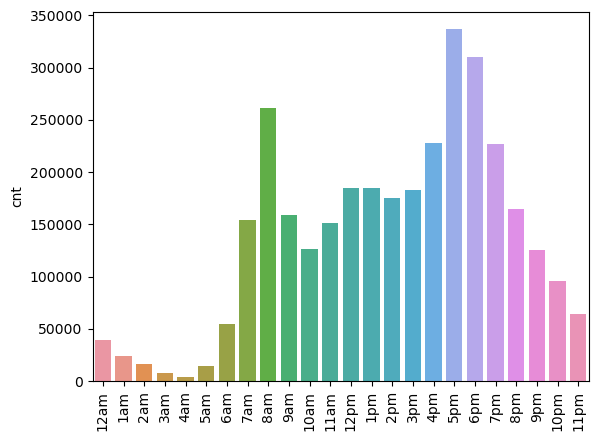

In [89]:
# Visualize total bike rental count for per hour

hour_sequence = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am',
                 '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']

sns.barplot(x = hour_sequence, y = grouped_by_hr.loc[hour_sequence, 'cnt'])
plt.xticks(rotation=90)
plt.show()

The count of bike rentals are higher in the morning (\~8am) and evening (\~5pm) hours.

### 3.7 Visualize the distribution of count, casual and registered variables

c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


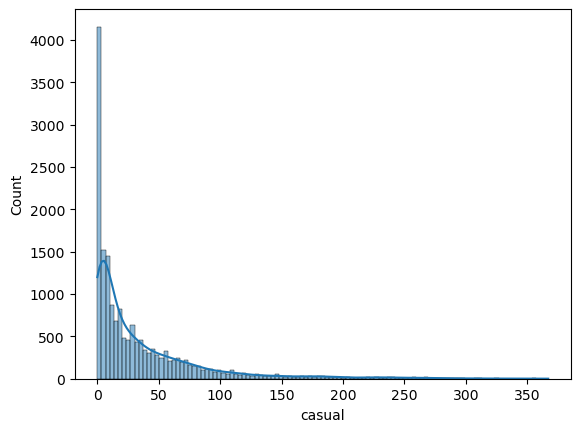

In [90]:
# distribution of casual
sns.histplot(bikeshare['casual'], kde=True);
plt.show()

c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


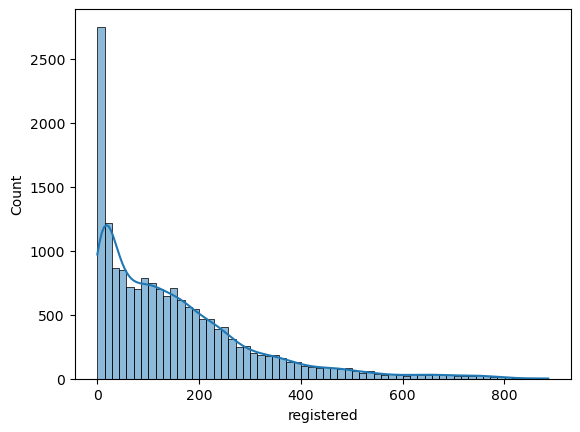

In [91]:
# distribution of registered
sns.histplot(bikeshare['registered'], kde=True);

c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


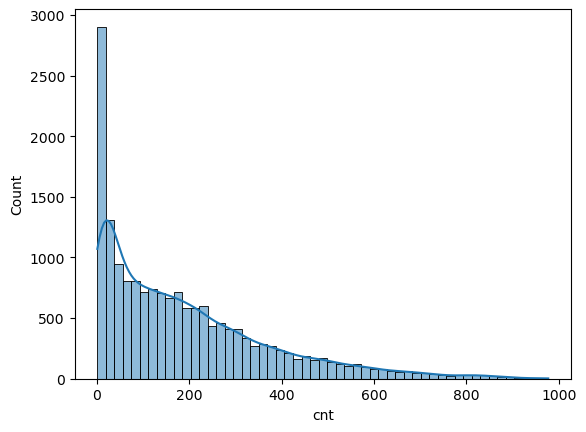

In [92]:
# distribution of count
sns.histplot(bikeshare['cnt'], kde=True);

### 3.8 Describe the relation of weekday, holiday and working day

In [93]:
# Unique values of 'workingday'
bikeshare['workingday'].unique()

array(['Yes', 'No'], dtype=object)

In [94]:
# Check which weekdays are working days (Mon - Fri)
bikeshare[bikeshare.workingday=='Yes'].weekday.unique()

array(['Mon', 'Wed', 'Thu', 'Tue', 'Fri', nan], dtype=object)

In [95]:
# Check on which weekdays, holiday is possible
bikeshare[bikeshare.holiday=='Yes'].weekday.unique()

array(['Mon', 'Fri', 'Thu', nan, 'Tue', 'Wed'], dtype=object)

In [96]:
# Not a holiday, not a working day (Sat, Sun)
bikeshare[(bikeshare.holiday=='No') & (bikeshare.workingday=='No')].weekday.unique()

array([nan, 'Sun', 'Sat'], dtype=object)

### 3.9 Visualize the monthly wise count of both casual and registered rentals for the year 2011 and 2012 separately.

Hint: [Stacked barchart](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

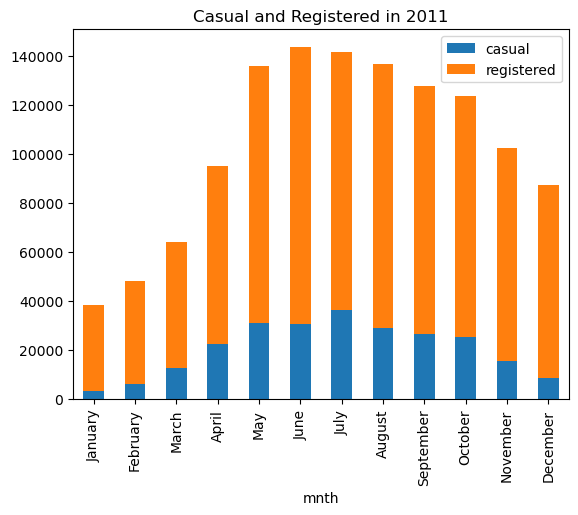

In [97]:
# stacked bar chart for year 2011
mnth_sequence = ['January', 'February', 'March', 'April', 'May', 'June',
                 'July', 'August', 'September', 'October', 'November', 'December']

grouped_by_mnth = bikeshare[bikeshare.yr==2011].groupby('mnth').sum(['casual','registered'])

grouped_by_mnth.loc[mnth_sequence, ['casual','registered']].plot.bar(stacked=True);
plt.title("Casual and Registered in 2011")
plt.show()

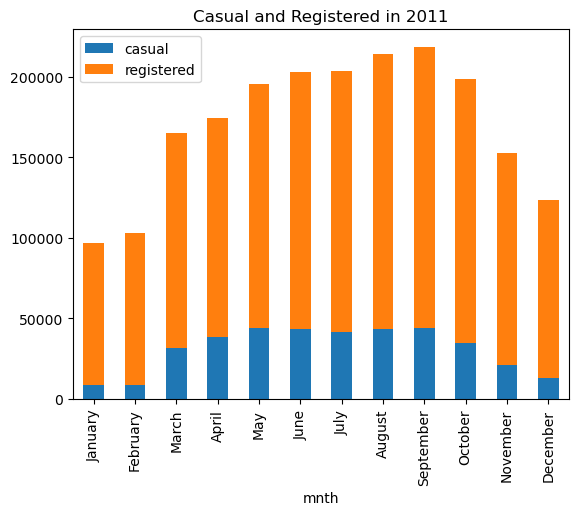

In [98]:
# stacked bar chart for year 2011
mnth_sequence = ['January', 'February', 'March', 'April', 'May', 'June',
                 'July', 'August', 'September', 'October', 'November', 'December']

grouped_by_mnth = bikeshare[bikeshare.yr==2012].groupby('mnth').sum(['casual','registered'])

grouped_by_mnth.loc[mnth_sequence, ['casual','registered']].plot.bar(stacked=True);
plt.title("Casual and Registered in 2011")
plt.show()

## **4. Split the data into train and test set**

**Note:** Apply all your data preprocessing steps in the train set first (to avoid any data leakage), and keep the test set aside.

In [99]:
# Separate target and prediction features
X = bikeshare.drop(target_col, axis=1)
y = bikeshare[target_col]

X.shape, y.shape

((17379, 15), (17379, 1))

In [100]:
# Apply train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((13903, 15), (3476, 15))

## **5. Feature Engineering**

### 5.1 Handling missing values in `weekday` column:

- Find the number of NaN entries in the `weekday` column, and get their row indices
- Use the `dteday` column to extract day names
- Impute values for the missing row indices in `weekday` column with the day names extracted above

**Note that** the extracted day names will contain full names (eg. 'Monday'), and the `weekday` column contains only first three letters (eg. 'Mon').

In [101]:
# Values present in 'weekday' column
X_train['weekday'].unique()

array(['Thu', nan, 'Wed', 'Sat', 'Mon', 'Tue', 'Sun', 'Fri'], dtype=object)

In [158]:
bikeshare.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr,mnth
0,2012-11-05,winter,6am,No,Mon,Yes,Mist,6.10,3.0014,49.0,19.0012,4,135,139,2012,November
1,2011-07-13,fall,4am,No,Wed,Yes,Clear,26.78,28.9988,58.0,16.9979,0,5,5,2011,July
2,2012-02-09,spring,11am,No,Thu,Yes,Clear,3.28,-0.9982,52.0,15.0013,4,95,99,2012,February
3,2012-03-22,summer,7am,No,Thu,Yes,Mist,14.56,15.0002,100.0,6.0032,29,332,361,2012,March
4,2011-11-08,winter,12pm,No,Tue,Yes,Clear,16.44,17.0000,52.0,8.9981,28,175,203,2011,November


In [159]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   hr          17379 non-null  object        
 3   holiday     17379 non-null  object        
 4   weekday     16504 non-null  object        
 5   workingday  17379 non-null  object        
 6   weathersit  16121 non-null  object        
 7   temp        17379 non-null  float64       
 8   atemp       17379 non-null  float64       
 9   hum         17379 non-null  float64       
 10  windspeed   17379 non-null  float64       
 11  casual      17379 non-null  int64         
 12  registered  17379 non-null  int64         
 13  cnt         17379 non-null  int64         
 14  yr          17379 non-null  int32         
 15  mnth        17379 non-null  object        
dtypes: datetime64[ns](1), 

In [102]:
# Function to impute weekday by extracting day name from the date column

def impute_weekday(dataframe):

    df = dataframe.copy()
    wkday_null_idx = df[df['weekday'].isnull() == True].index
    # print(len(wkday_null_idx))
    df.loc[wkday_null_idx, 'weekday'] = df.loc[wkday_null_idx, 'dteday'].dt.day_name().apply(lambda x: x[:3])

    return df

In [103]:
# Impute weekday
X_train = impute_weekday(X_train)

X_train['weekday'].unique()

array(['Thu', 'Wed', 'Sat', 'Fri', 'Mon', 'Tue', 'Sun'], dtype=object)

In [104]:
X_train.isnull().sum()

dteday           0
season           0
hr               0
holiday          0
weekday          0
workingday       0
weathersit    1001
temp             0
atemp            0
hum              0
windspeed        0
casual           0
registered       0
yr               0
mnth             0
dtype: int64

### 5.2 Handling missing values in `weathersit` column:

- Fill in the missing rows in this column with the most frequent category

In [105]:
# Values present in 'weekday' column
X_train['weathersit'].unique()

array(['Clear', 'Mist', 'Light Rain', nan, 'Heavy Rain'], dtype=object)

In [106]:
# Unique values and their counts
X_train['weathersit'].value_counts()

weathersit
Clear         8169
Mist          3605
Light Rain    1125
Heavy Rain       3
Name: count, dtype: int64

In [107]:
# Most frequent category
X_train['weathersit'].mode()[0]

'Clear'

In [108]:
# Fill missing values in weathersit
X_train['weathersit'].fillna('Clear', inplace=True)

X_train['weathersit'].unique()

array(['Clear', 'Mist', 'Light Rain', 'Heavy Rain'], dtype=object)

In [109]:
X_train.isnull().sum()

dteday        0
season        0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
yr            0
mnth          0
dtype: int64

In [ ]:
bikeshare

### 5.3 Handling outliers in numerical columns:

- Instead of removing the outliers, change their values
    - to upper-bound, if the value is higher than upper-bound, or
    - to lower-bound, if the value is lower than lower-bound respectively.

In [110]:
# Function to handle outliers for a single column

def handle_outliers(dataframe, colm):

    df = dataframe.copy()
    q1 = df.describe()[colm].loc['25%']
    q3 = df.describe()[colm].loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in df.index:
        if df.loc[i,colm] > upper_bound:
            df.loc[i,colm]= upper_bound
        if df.loc[i,colm] < lower_bound:
            df.loc[i,colm]= lower_bound

    return df

In [111]:
# Handle outliers for all numerical columns

for col in numerical_features:
    X_train = handle_outliers(X_train, col)

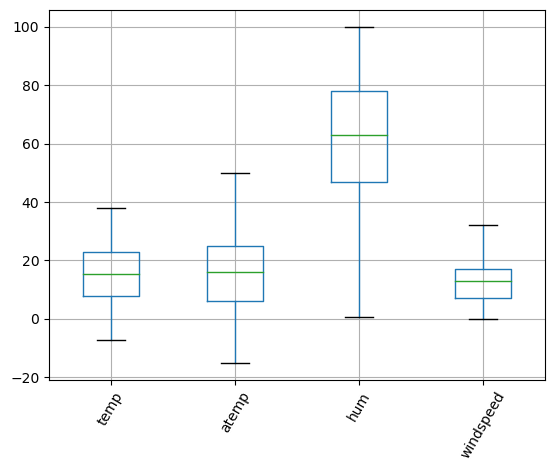

In [112]:
# Re-check for outliers in continuous features
X_train[numerical_features].boxplot()
plt.xticks(rotation= 60)
plt.show()

### 5.4 Map `yr` (year) column


In [113]:
# Create a temporary copy of X_train, and add target column to it, for exploration
tmp_df = X_train.copy()
tmp_df['cnt'] = y_train
tmp_df.head(2)

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,yr,mnth,cnt
335,2011-12-08,winter,1pm,No,Thu,Yes,Clear,6.10,1.9982,49.0,23.9994,9,115,2011,December,124
7035,2011-09-15,fall,4pm,No,Thu,Yes,Mist,17.38,18.0032,77.0,31.0009,29,193,2011,September,222


c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


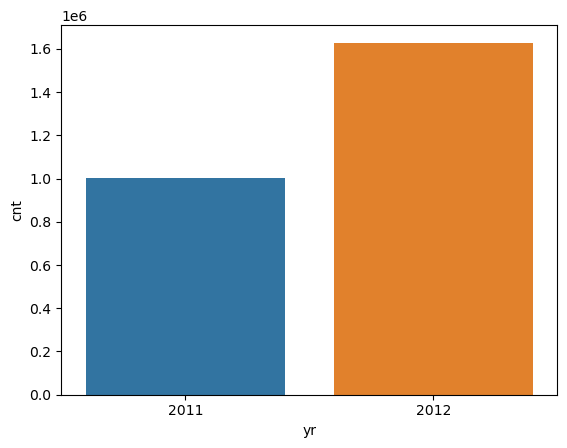

In [114]:
# Visualize the total bike rental count per year
feature = 'yr'
grouped_by_yr = tmp_df.groupby(feature).sum('cnt')
sns.barplot(x = grouped_by_yr.index, y = grouped_by_yr['cnt'])
plt.show()

In [115]:
# Treating 'yr' column as Ordinal categorical variable, assign higher value to 2012

yr_mapping = {2011: 0, 2012: 1}
X_train['yr'] = X_train['yr'].apply(lambda x: yr_mapping[x])

In [116]:
X_train.head(2)

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,yr,mnth
335,2011-12-08,winter,1pm,No,Thu,Yes,Clear,6.10,1.9982,49.0,23.9994,9,115,0,December
7035,2011-09-15,fall,4pm,No,Thu,Yes,Mist,17.38,18.0032,77.0,31.0009,29,193,0,September


### 5.5 Map `mnth` (month) column


c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


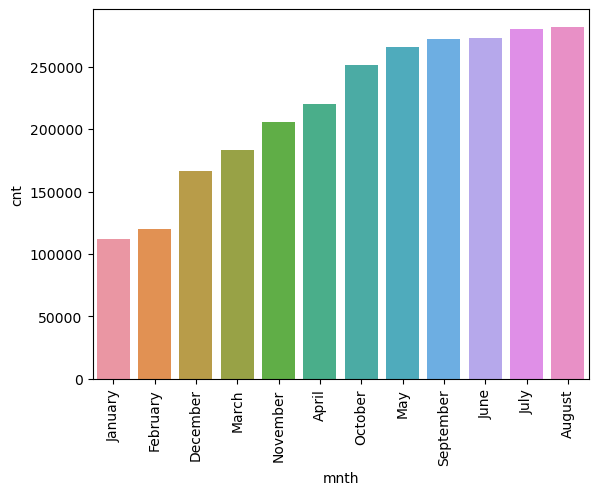

In [117]:
# Visualize the total bike rental count per month
feature = 'mnth'
grouped_by_mnth = tmp_df.groupby(feature).sum('cnt').sort_values('cnt')
sns.barplot(x = grouped_by_mnth.index, y = grouped_by_mnth['cnt'])
plt.xticks(rotation=90)
plt.show()

In [118]:
# Treat 'mnth' column as Ordinal categorical variable, and assign values accordingly

mnth_mapping = {'January': 0, 'February': 1, 'December': 2, 'March': 3, 'November': 4, 'April': 5,
                'October': 6, 'May': 7, 'September': 8, 'June': 9, 'July': 10, 'August': 11}

X_train['mnth'] = X_train['mnth'].apply(lambda x: mnth_mapping[x])

In [119]:
X_train.head(2)

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,yr,mnth
335,2011-12-08,winter,1pm,No,Thu,Yes,Clear,6.10,1.9982,49.0,23.9994,9,115,0,2
7035,2011-09-15,fall,4pm,No,Thu,Yes,Mist,17.38,18.0032,77.0,31.0009,29,193,0,8


### 5.6 Map `season` column

c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


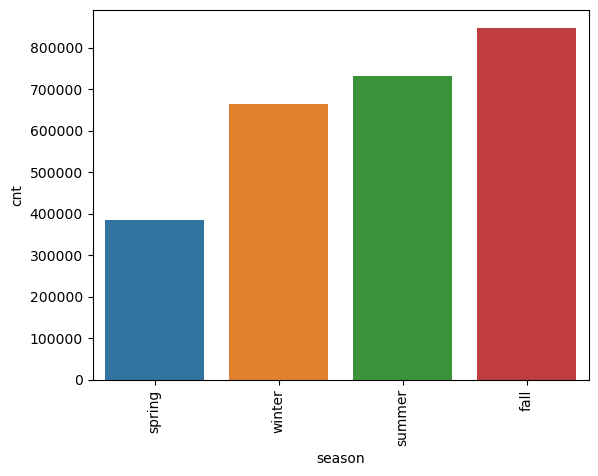

In [120]:
# Visualize the total bike rental count per season
feature = 'season'
grouped_by_season = tmp_df.groupby(feature).sum('cnt').sort_values('cnt')
sns.barplot(x = grouped_by_season.index, y = grouped_by_season['cnt'])
plt.xticks(rotation=90)
plt.show()

In [121]:
# Treat 'season' column as Ordinal categorical variable, and assign values accordingly

season_mapping = {'spring': 0, 'winter': 1, 'summer': 2, 'fall': 3}

X_train['season'] = X_train['season'].apply(lambda x: season_mapping[x])

In [122]:
X_train.head(2)

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,yr,mnth
335,2011-12-08,1,1pm,No,Thu,Yes,Clear,6.10,1.9982,49.0,23.9994,9,115,0,2
7035,2011-09-15,3,4pm,No,Thu,Yes,Mist,17.38,18.0032,77.0,31.0009,29,193,0,8


### 5.7 Map `weathersit` column

c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


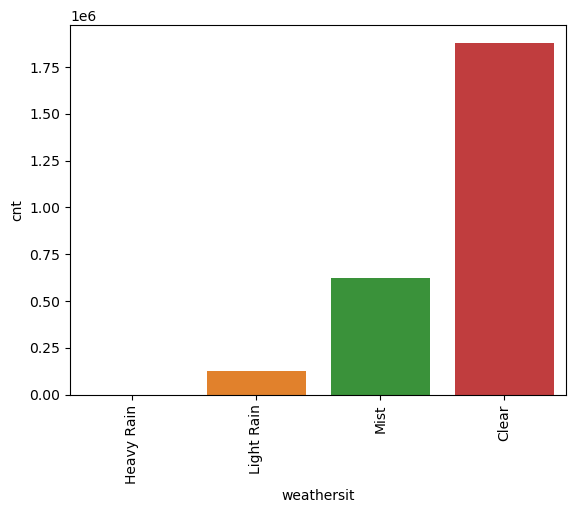

In [123]:
# Visualize the total bike rental count per weather situation
feature = 'weathersit'
grouped_by_weather = tmp_df.groupby(feature).sum('cnt').sort_values('cnt')
sns.barplot(x = grouped_by_weather.index, y = grouped_by_weather['cnt'])
plt.xticks(rotation=90)
plt.show()

In [124]:
# Map weather situation

weather_mapping = {'Heavy Rain': 0, 'Light Rain': 1, 'Mist': 2, 'Clear': 3}

X_train['weathersit'] = X_train['weathersit'].apply(lambda x: weather_mapping[x])

In [125]:
X_train.head(2)

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,yr,mnth
335,2011-12-08,1,1pm,No,Thu,Yes,3,6.10,1.9982,49.0,23.9994,9,115,0,2
7035,2011-09-15,3,4pm,No,Thu,Yes,2,17.38,18.0032,77.0,31.0009,29,193,0,8


### 5.8 Map `holiday` column

c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


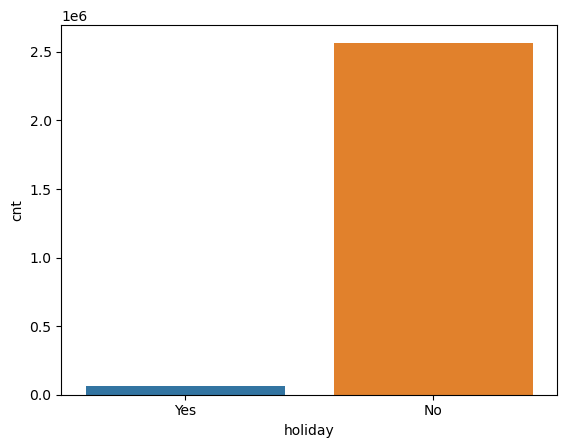

In [126]:
# Visualize the total bike rental count based on whether the day is holiday
feature = 'holiday'
grouped_by_holiday = tmp_df.groupby(feature).sum('cnt').sort_values('cnt')
sns.barplot(x = grouped_by_holiday.index, y = grouped_by_holiday['cnt'])
plt.show()

In [127]:
# Map holiday

holiday_mapping = {'Yes': 0, 'No': 1}
X_train['holiday'] = X_train['holiday'].apply(lambda x: holiday_mapping[x])

In [128]:
X_train.head(2)

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,yr,mnth
335,2011-12-08,1,1pm,1,Thu,Yes,3,6.10,1.9982,49.0,23.9994,9,115,0,2
7035,2011-09-15,3,4pm,1,Thu,Yes,2,17.38,18.0032,77.0,31.0009,29,193,0,8


### 5.9 Map `workingday` column

c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


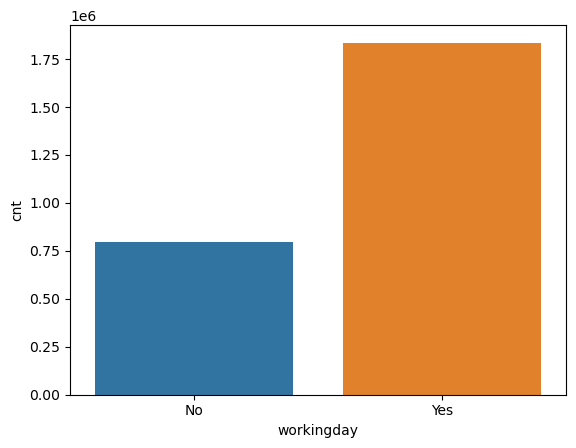

In [129]:
# Visualize the total bike rental count based on whether the day is a workingday
feature = 'workingday'
grouped_by_wrkday = tmp_df.groupby(feature).sum('cnt').sort_values('cnt')
sns.barplot(x = grouped_by_wrkday.index, y = grouped_by_wrkday['cnt'])
plt.show()

In [130]:
# Map workingday

workingday_mapping = {'No': 0, 'Yes': 1}

X_train['workingday'] = X_train['workingday'].apply(lambda x: workingday_mapping[x])

In [131]:
X_train.head(2)

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,yr,mnth
335,2011-12-08,1,1pm,1,Thu,1,3,6.10,1.9982,49.0,23.9994,9,115,0,2
7035,2011-09-15,3,4pm,1,Thu,1,2,17.38,18.0032,77.0,31.0009,29,193,0,8


### 5.10 Map `hr` (hour) column

c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


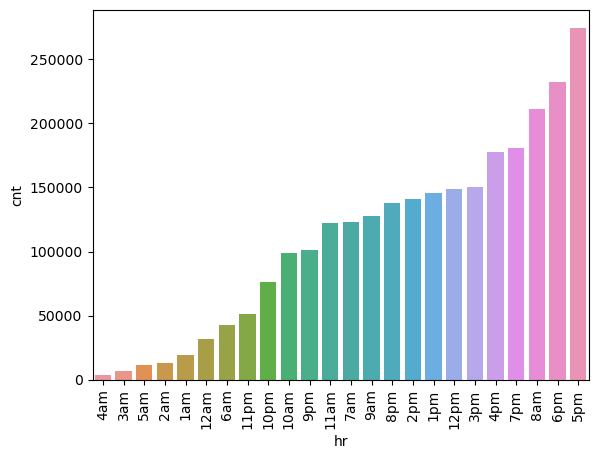

In [132]:
# Visualize the total bike rental count per hour
feature = 'hr'
grouped_by_hr = tmp_df.groupby(feature).sum('cnt').sort_values('cnt')
sns.barplot(x = grouped_by_hr.index, y = grouped_by_hr['cnt'])
plt.xticks(rotation=90)
plt.show()

In [133]:
# Map hour

hour_mapping = {'4am': 0, '3am': 1, '5am': 2, '2am': 3, '1am': 4, '12am': 5, '6am': 6, '11pm': 7, '10pm': 8,
                '10am': 9, '9pm': 10, '11am': 11, '7am': 12, '9am': 13, '8pm': 14, '2pm': 15, '1pm': 16,
                '12pm': 17, '3pm': 18, '4pm': 19, '7pm': 20, '8am': 21, '6pm': 22, '5pm': 23}

X_train['hr'] = X_train['hr'].apply(lambda x: hour_mapping[x])

In [134]:
X_train.head(2)

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,yr,mnth
335,2011-12-08,1,16,1,Thu,1,3,6.10,1.9982,49.0,23.9994,9,115,0,2
7035,2011-09-15,3,19,1,Thu,1,2,17.38,18.0032,77.0,31.0009,29,193,0,8


### 5.11 One-hot Encode `weekday` column

c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\shaikn\AppData\Local\anaconda3\envs\GPU\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


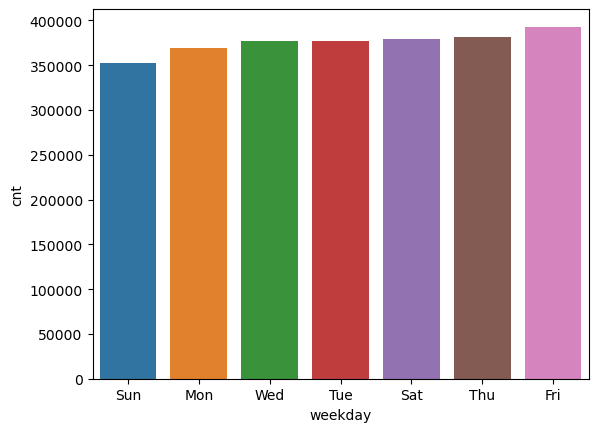

In [135]:
# Visualize the total bike rental count per weekday
feature = 'weekday'
grouped_by_wkday = tmp_df.groupby(feature).sum('cnt').sort_values('cnt')
sns.barplot(x = grouped_by_wkday.index, y = grouped_by_wkday['cnt'])
plt.show()

In [136]:
# Treating 'weekday' column as a Nominal categorical variable, perform one-hot encoding

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X_train[['weekday']])

OneHotEncoder(sparse_output=False)

In [137]:
encoded_weekday = encoder.transform(X_train[['weekday']])
encoded_weekday.shape

(13903, 7)

In [138]:
# Get encoded feature names
enc_wkday_features = encoder.get_feature_names_out(['weekday'])
enc_wkday_features

array(['weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'], dtype=object)

In [139]:
# Append encoded weekday features to X_train
X_train[enc_wkday_features] = encoded_weekday
X_train.shape

(13903, 22)

In [140]:
X_train.head(2)

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,registered,yr,mnth,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
335,2011-12-08,1,16,1,Thu,1,3,6.10,1.9982,49.0,...,115,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7035,2011-09-15,3,19,1,Thu,1,2,17.38,18.0032,77.0,...,193,0,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 5.12 Remove unnecessary columns

In [141]:
# List of unused columns
unused_colms.append('weekday')
unused_colms

['dteday', 'casual', 'registered', 'weekday']

In [142]:
X_train.shape

(13903, 22)

In [143]:
# Drop columns from X_train
X_train.drop(labels = unused_colms, axis = 1, inplace = True)
X_train.shape

(13903, 18)

In [144]:
X_train.head(2)

,season,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,yr,mnth,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
335,1,16,1,1,3,6.10,1.9982,49.0,23.9994,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7035,3,19,1,1,2,17.38,18.0032,77.0,31.0009,0,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Analyze the correlation between features with heatmap

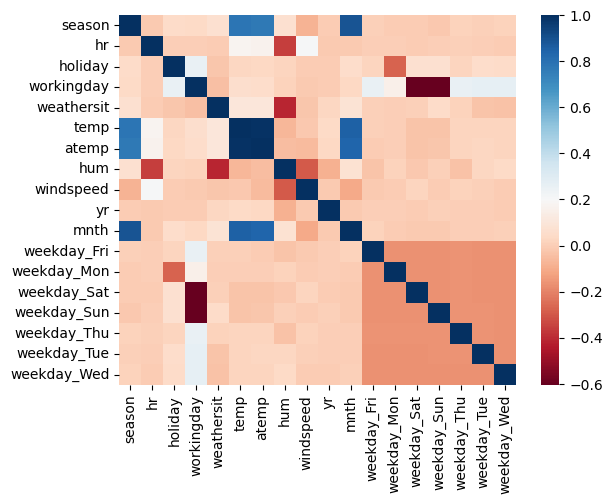

In [145]:
sns.heatmap(X_train.iloc[:,:].corr(numeric_only=True), cmap='RdBu')
plt.show()

Among the features showing high correlation, any one can be considered for model training.

For now, consider all the features.

### 5.13 Apply Standard Scalar

In [146]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled[0,:]

array([-0.47206567,  0.64468101,  0.17277688,  0.67638029,  0.66112249,
       -1.02829491, -1.18794399, -0.70634832,  1.43071367, -1.00151161,
       -1.02714193, -0.41026739, -0.40918992, -0.40895032, -0.40619057,
        2.47509377, -0.40811125, -0.41098503])

### 5.14 Create a single function for preprocessing the test set (X_test) and apply it

**Note**: All the pre-processing steps that were applied on the train set before ML Modelling are also applied on the test set before passing through the predict function.

In [147]:
## Create a function for pre-processing test set

def pre_process(dataframe):

    df = dataframe.copy()
    df = impute_weekday(df)
    df['weathersit'].fillna('Clear', inplace=True)

    for col in numerical_features:
        df = handle_outliers(df, col)

    df['yr'] = df['yr'].apply(lambda x: yr_mapping[x])
    df['mnth'] = df['mnth'].apply(lambda x: mnth_mapping[x])
    df['season'] = df['season'].apply(lambda x: season_mapping[x])
    df['weathersit'] = df['weathersit'].apply(lambda x: weather_mapping[x])
    df['holiday'] = df['holiday'].apply(lambda x: holiday_mapping[x])
    df['workingday'] = df['workingday'].apply(lambda x: workingday_mapping[x])
    df['hr'] = df['hr'].apply(lambda x: hour_mapping[x])

    encoded_weekday_test = encoder.transform(df[['weekday']])
    df[enc_wkday_features] = encoded_weekday_test

    df.drop(labels = unused_colms, axis = 1, inplace = True)

    return df


In [148]:
# Applying above function on X_test
x_test = pre_process(X_test)
x_test.info()
x_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3476 entries, 12830 to 8211
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       3476 non-null   int64  
 1   hr           3476 non-null   int64  
 2   holiday      3476 non-null   int64  
 3   workingday   3476 non-null   int64  
 4   weathersit   3476 non-null   int64  
 5   temp         3476 non-null   float64
 6   atemp        3476 non-null   float64
 7   hum          3476 non-null   float64
 8   windspeed    3476 non-null   float64
 9   yr           3476 non-null   int64  
 10  mnth         3476 non-null   int64  
 11  weekday_Fri  3476 non-null   float64
 12  weekday_Mon  3476 non-null   float64
 13  weekday_Sat  3476 non-null   float64
 14  weekday_Sun  3476 non-null   float64
 15  weekday_Thu  3476 non-null   float64
 16  weekday_Tue  3476 non-null   float64
 17  weekday_Wed  3476 non-null   float64
dtypes: float64(11), int64(7)
memory usage: 645.0 KB


,season,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,yr,mnth,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
12830,2,14,1,0,1,8.92,5.9978,93.0,27.9993,1,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8688,2,1,1,0,2,21.14,24.0026,65.0,11.0014,0,9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7091,1,8,1,0,3,2.34,-0.9982,75.0,12.9980,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12230,2,0,1,0,3,17.38,18.0032,68.0,8.9981,1,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0
431,3,0,1,1,3,23.02,24.0026,83.0,6.0032,1,10,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 5.15 Apply Standard Scalar transformation to x_test





In [149]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled[0,:]

array([ 0.41881651,  0.35508489,  0.17277688, -1.47845821, -2.47379771,
       -0.71655971, -0.83494112,  1.574515  ,  1.93558182,  0.99849067,
       -0.15887694, -0.41026739, -0.40918992, -0.40895032,  2.46189858,
       -0.4040251 , -0.40811125, -0.41098503])

## **6.** Apply multiple ML algorithms and display the Mean squared error and $R^2$ score

### 6.1 LinearRegression

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [150]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(X_train_scaled, y_train.values.ravel())

LinearRegression()

In [151]:
# Prediction for test set
y_pred_lr = regr_linear.predict(x_test_scaled)

# Calculate the score/error
print("R2 score:", r2_score(y_test, y_pred_lr))
print("Mean squared error:", mean_squared_error(y_test, y_pred_lr))

R2 score: 0.6386660047856612
Mean squared error: 12240.032141683945


### 6.2 SGD Regressor

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [152]:
sgd = linear_model.SGDRegressor()
sgd = sgd.fit(X_train_scaled, y_train.values.ravel())

In [153]:
# Prediction for test set
y_pred_sgd = sgd.predict(x_test_scaled)

# Calculate the score/error
print("R2 score:", r2_score(y_test, y_pred_sgd))
print("Mean squared error:", mean_squared_error(y_test, y_pred_sgd))

R2 score: 0.6381044203848886
Mean squared error: 12259.055569334718


#### 6.3 Random Forest

Hint: [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [154]:
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

In [155]:
# Fit the model
model_rf.fit(X_train_scaled, y_train.values.ravel())

RandomForestRegressor(max_depth=10, random_state=42)

In [156]:
# Prediction for test set
y_pred = model_rf.predict(x_test_scaled)

# Calculate the score/error
print("R2 score:", r2_score(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))

R2 score: 0.9197946785073274
Mean squared error: 2716.920428209541
